https://www.analyticsvidhya.com/blog/2022/10/outliers-detection-using-iqr-z-score-lof-and-dbscan/

# Generating Dataset

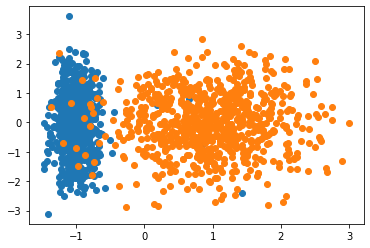

In [1]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1500, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=10)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()


In [2]:
import pandas as pd
a=[]
b=[]
c=[]
for i in range(len(X)):
  a.append(X[i,0]*1000)
  b.append(X[i,1]*1000)
  c.append(y[i])

In [3]:
df = pd.DataFrame({"X":a,"Y":b,"Class":c})

In [4]:
df1= df[df["Class"]==0].reset_index()
df2= df[df["Class"]==1].reset_index()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df.head()
print('shape of data:',df.shape)

shape of data: (1500, 3)


Text(0.5, 0, 'X')

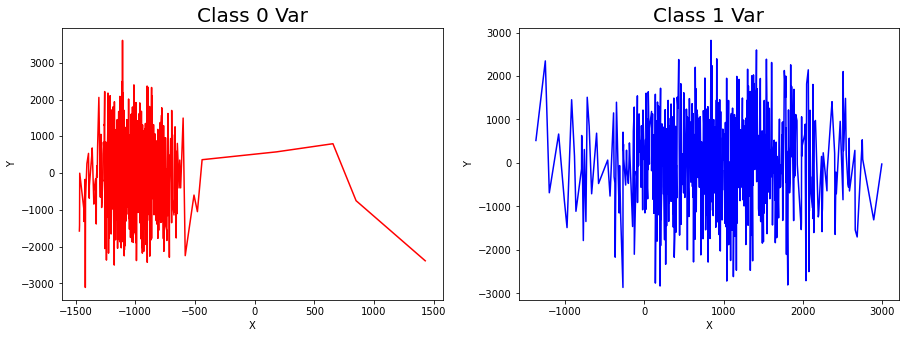

In [6]:
plt.figure(figsize =(15,5))
plt.subplot(1,2,1)
sns.lineplot(x=df1['X'], y=df1['Y'], color='r')
plt.title("Class 0 Var", fontsize=20)
plt.xlabel('X')
plt.subplot(1,2,2)
sns.lineplot(x=df2['X'], y=df2['Y'], color='b')
plt.title("Class 1 Var", fontsize=20)
plt.xlabel('X')

# Inter Quartile Range (IQR) Method

(array([-4000., -3000., -2000., -1000.,     0.,  1000.,  2000.,  3000.,
         4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

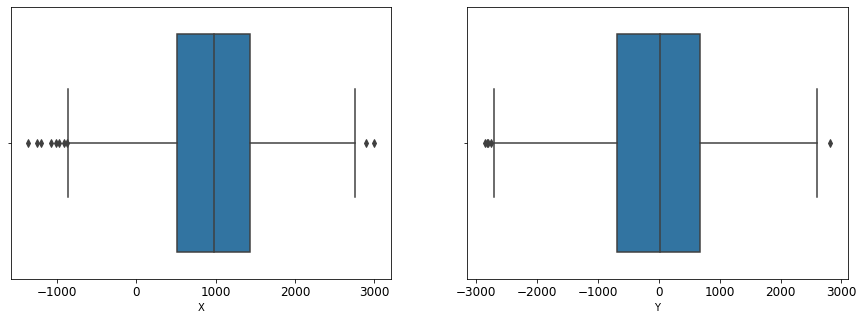

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df2['X'])
plt.xticks(fontsize = (12))
plt.xlabel('X')

plt.subplot(1,2,2)
sns.boxplot(df2['Y'])
plt.xlabel('Y')
plt.xticks(fontsize =(12))


In [8]:
def identifying_treating_outliers(df,col,remove_or_fill_with_quartile):

  q1=df[col].quantile(0.25)

  q3=df[col].quantile(0.75)

  iqr=q3-q1

  lower_fence=q1-1.5*(iqr)

  upper_fence=q3+1.5*(iqr)

  print('Lower Fence;', lower_fence)

  print('Upper Fence:', upper_fence)

  print('Total number of outliers are left:', df[df[col] > upper_fence].shape[0])

  if remove_or_fill_with_quartile=="drop":

    df.drop(df.loc[df[col]<lower_fence].index,inplace=True)

    df.drop(df.loc[df[col]>upper_fence].index,inplace=True)

  elif remove_or_fill_with_quartile=="fill":

    df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])

    df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])

In [9]:
identifying_treating_outliers(df2,'X','drop')
identifying_treating_outliers(df2,'Y','drop')

Lower Fence; -870.6024194590336
Upper Fence: 2816.4676144522255
Total number of outliers are left: 2
Lower Fence; -2739.94715442905
Upper Fence: 2736.943531385756
Total number of outliers are left: 1


In [10]:
df2 = df2.reset_index()

In [11]:
df2.drop(["level_0","index"],axis=1,inplace=True)

(array([-3000., -2000., -1000.,     0.,  1000.,  2000.,  3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

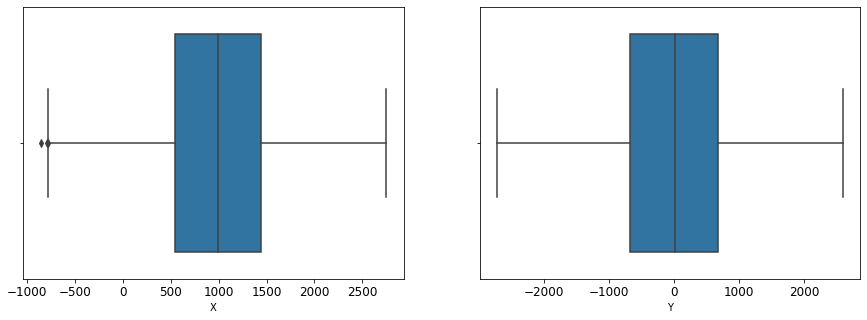

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df2['X'])
plt.xticks(fontsize = (12))
plt.xlabel('X')

plt.subplot(1,2,2)
sns.boxplot(df2['Y'])
plt.xlabel('Y')
plt.xticks(fontsize =(12))

# Z-score Method

In [13]:
df1= df[df["Class"]==0].reset_index()
df2= df[df["Class"]==1].reset_index()

Text(0.5, 1.0, 'Z Score Plot After Removing Outlier')

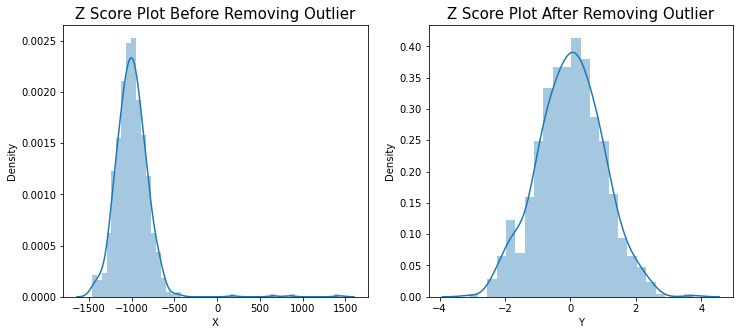

In [14]:
uplx = df1['X'].mean() + 3*df1['X'].std()
lwlx = df1['X'].mean() - 3*df1['X'].std()
dfn = df1[(df1['X'] > lwlx) | (df1['X'] < uplx)]

uplx = df1['Y'].mean() + 3*df1['Y'].std()
lwlx = df1['Y'].mean() - 3*df1['Y'].std()
dfn2 = dfn[(dfn['Y'] > lwlx) | (dfn['Y'] < uplx)]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df1['X'])
plt.title('Z Score Plot Before Removing Outlier',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(st.zscore(dfn2['Y']))
plt.title('Z Score Plot After Removing Outlier',fontsize=15)

# Local Outliers Finder (LOF) Method

In [15]:
df1= df[df["Class"]==0].reset_index()
df2= df[df["Class"]==1].reset_index()

In [16]:
df1.drop(["Class","index"],axis=1,inplace=True)
df2.drop(["Class","index"],axis=1,inplace=True)

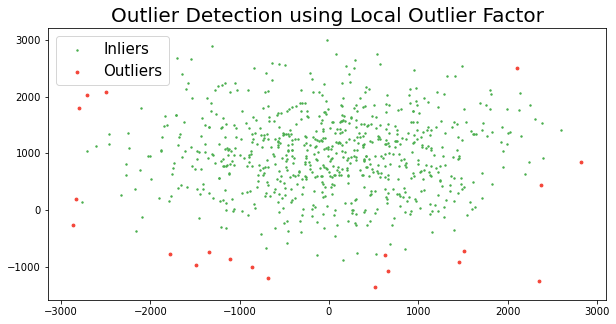

In [17]:
from sklearn.neighbors import LocalOutlierFactor
d2 = df2.values #converting the df into numpy array
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
good = lof.fit_predict(d2) == 1
plt.figure(figsize=(10,5))
plt.scatter(d2[good, 1], d2[good, 0], s=2, label="Inliers", color="#4CAF50")
plt.scatter(d2[~good, 1], d2[~good, 0], s=8, label="Outliers", color="#F44336")
plt.title('Outlier Detection using Local Outlier Factor', fontsize=20)
plt.legend (fontsize=15, title_fontsize=15)

# Density-Based Spatial Clustering for Application with Noise (DBSCAN) Method

In [18]:
df1= df[df["Class"]==0].reset_index()
df2= df[df["Class"]==1].reset_index()

In [19]:
df1.drop(["Class","index"],axis=1,inplace=True)
df2.drop(["Class","index"],axis=1,inplace=True)

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df2[['X','Y']] = mms.fit_transform(df2[['X','Y']])
df2.head()

,X,Y
0,0.568505,0.403179
1,0.481972,0.497205
2,0.325664,0.730982
3,0.360345,0.806209
4,0.702455,0.496976


In [21]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df2[['X', 'Y']])
distances, indices = nbrs.kneighbors(df2[['X', 'Y']])
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]

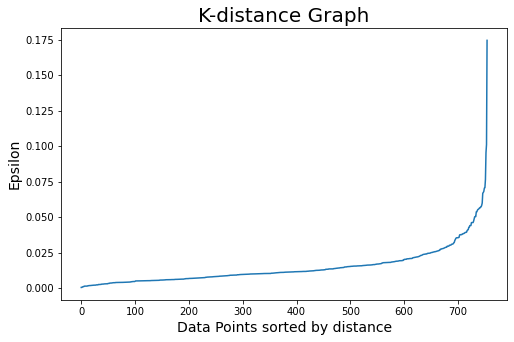

In [22]:
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Text(0.5, 1.0, 'Outliers Detection using DBSCAN')

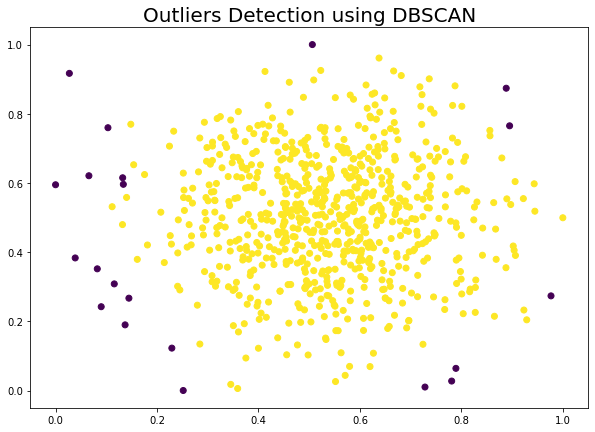

In [23]:
model = DBSCAN(eps = 0.1, min_samples = 10).fit(df2)
colors = model.labels_
plt.figure(figsize=(10,7))
plt.scatter(df2['X'], df2['Y'], c = colors)
plt.title('Outliers Detection using DBSCAN',fontsize=20)